In [38]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Q-learning in the wild (3 pts)

Here we use the qlearning agent on taxi env from openai gym.
You will need to insert a few agent functions here.

In [ ]:
import random,math
import numpy as np
from collections import defaultdict

class QLearningAgent():
  """
    Q-Learning Agent

    Instance variables you have access to
      - self.epsilon (exploration prob)
      - self.alpha (learning rate)
      - self.discount (discount rate aka gamma)

    Functions you should use
      - self.getLegalActions(state)
        which returns legal actions for a state
      - self.getQValue(state,action)
        which returns Q(state,action)
      - self.setQValue(state,action,value)
        which sets Q(state,action) := value

    !!!Important!!!
    NOTE: please avoid using self._qValues directly to make code cleaner
  """
  def __init__(self,alpha,epsilon,discount,getLegalActions):
    "We initialize agent and Q-values here."
    self.getLegalActions = getLegalActions
    self._qValues = defaultdict(lambda:defaultdict(lambda:0))
    self.alpha = alpha
    self.epsilon = epsilon
    self.discount = discount

  def getQValue(self, state, action):
    #print(state)
    #print(action)
    return self._qValues[state][action]

  def setQValue(self,state,action,value):
    """
      Sets the Qvalue for [state,action] to the given value
    """
    self._qValues[state][action] = value

#---------------------#start of your code#---------------------#

  def getValue(self, state): # max Q(state, action)
    possibleActions = self.getLegalActions(state)
    if len(possibleActions) == 0:
      return 0.0
    return max([self.getQValue(state, act) for act in possibleActions])

  def getPolicy(self, state): # best action in Q(state, action)
    possibleActions = self.getLegalActions(state)
    if len(possibleActions) == 0:
      return None
    actionsVal = [(act, self.getQValue(state, act)) for act in possibleActions]
    # actionsVal = np.array([self.getQValue(state, act) for act in possibleActions], dtype=np.float64)
    return max(actionsVal, key=lambda x: x[1])[0]

  def getAction(self, state): # compute action to take in state
    possibleActions = self.getLegalActions(state)
    if len(possibleActions) == 0:
      return None
    action = None
    if random.random() < self.epsilon:
      action = random.choice(possibleActions)
    else:
      action = self.getPolicy(state)

    return action

  def update(self, state, action, nextState, reward): # update Q[state, action]
    gamma = self.discount
    learning_rate = self.alpha

    self.setQValue(state, action, self.getQValue(state, action) + learning_rate * (reward + gamma * self.getValue(nextState) - self.getQValue(state, action)))

In [189]:
import gymnasium as gym

env = gym.make("Taxi-v3")
n_states = env.observation_space.n # type: ignore
n_actions = env.action_space.n     # type: ignore



In [190]:
def play_and_train(env, agent, t_max=10**4):
    """This function should
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s, _ = env.reset()


    for t in range(t_max):
        a = agent.getAction(s)

        next_s, r, term, trunc, _ = env.step(a)

        #<train(update) agent for state s>
        agent.update(s, a, next_s, r)

        s = next_s
        total_reward += r
        if term or trunc:
            break
    return total_reward

Достигните положительной награды, постройте график

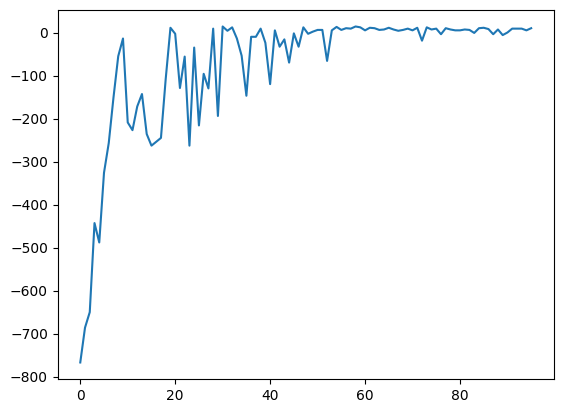

Last reward:  5.0


In [191]:
from IPython.display import clear_output
rewards = []
agent = QLearningAgent(alpha=0.15, epsilon=1.0, discount=0.98, getLegalActions = lambda s: range(n_actions))

cur_r = 0

for i in range(2000):
    cur_r = play_and_train(env, agent, t_max=10000)
    agent.epsilon *= 0.98
    if i % 20 == 0:
        rewards.append(cur_r)
    if i % 100 == 0:
        clear_output(True)
        plt.plot(rewards)
        plt.show()

print("Last reward: ", cur_r)


## 3. Continuous state space (2 pt)

Чтобы использовать табличный q-learning на continuous состояниях, надо как-то их обрабатывать и бинаризовать. Придумайте способ разбивки на дискретные состояния.

In [ ]:
env = gym.make("CartPole-v0")
n_actions = env.action_space.n
print("first state:%s"%(env.reset()))


### Play a few games

Постройте распределения различных частей состояния игры. Сыграйте несколько игр и запишите все состояния.

## Binarize environment

In [ ]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):

    def to_bin(self, value, bins):

        return

    def _observation(self,state):

        state = (self.to_bin(state[0], ), self.to_bin(state[1], ), self.to_bin(state[2], ), self.to_bin(state[3], ))

        return state

In [ ]:
env = Binarizer(gym.make("CartPole-v0"))

## Learn

In [ ]:
agent = QLearningAgent(alpha=,epsilon=,discount=,
                       getLegalActions = lambda s: range(n_actions))

In [ ]:
rewards = []
rewBuf = []
ma = -1000000000000
for i in range(10000):
    for i in range(100):
        rewards.append(play_and_train(env,agent))
    agent.epsilon *= #
    rewBuf.append(np.mean(rewards[-100:]))
    clear_output(True)
    print(agent.epsilon)
    print(rewBuf[-1])
    plt.plot(rewBuf)
    if(rewBuf[-1] > 195):
        print("Win!")
        break
    plt.show()


## 4. Experience replay (5 pts)

In [ ]:
import random
class ReplayBuffer(object):
    def __init__(self, size):
        """Create Replay buffer.
        Parameters
        ----------
        size: int
            Max number of transitions to store in the buffer. When the buffer
            overflows the old memories are dropped.
        """
        self._storage = []
        self._maxsize = size
        self._replaceId = 0


    def __len__(self):
        return len(self._storage)

    def add(self, obs_t, action, reward, obs_tp1, done):
        '''
        Make sure, _storage will not exceed _maxsize.
        '''
        data = (obs_t, action, reward, obs_tp1, done)
        if len(self._storage) == self._maxsize:
            #
        else:
            #

    def sample(self, batch_size):
        """Sample a batch of experiences.
        Parameters
        ----------
        batch_size: int
            How many transitions to sample.
        Returns
        -------
        obs_batch: np.array
            batch of observations
        act_batch: np.array
            batch of actions executed given obs_batch
        rew_batch: np.array
            rewards received as results of executing act_batch
        next_obs_batch: np.array
            next set of observations seen after executing act_batch
        done_mask: np.array
            done_mask[i] = 1 if executing act_batch[i] resulted in
            the end of an episode and 0 otherwise.
        """

        #

        return states, actions, rewards, next_states, is_done


Some tests to make sure your buffer works right

In [ ]:
import numpy as np
replay = ReplayBuffer(2)
obj1 = tuple(range(5))
obj2 = tuple(range(5, 10))
replay.add(*obj1)
assert replay.sample(1)==obj1, "If there's just one object in buffer, it must be retrieved by buf.sample(1)"
replay.add(*obj2)
assert len(replay._storage)==2, "Please make sure __len__ methods works as intended."
replay.add(*obj2)
assert len(replay._storage)==2, "When buffer is at max capacity, replace objects instead of adding new ones."
assert tuple(np.unique(a) for a in replay.sample(100))==obj2
replay.add(*obj1)
assert max(len(np.unique(a)) for a in replay.sample(100))==2
replay.add(*obj1)
assert tuple(np.unique(a) for a in replay.sample(100))==obj1
print ("Success!")

Now let's use this buffer to improve training:

In [ ]:
import gym
env = Binarizer(gym.make('CartPole-v0'))
n_actions = env.action_space.n

In [ ]:
agent = QLearningAgent(alpha=,epsilon=,discount=,
                       getLegalActions = lambda s: range(n_actions))
replay = ReplayBuffer(10000)

In [ ]:
def play_and_train(env, agent, t_max=10**4, batch_size=10):
    """This function should
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()

    for t in range(t_max):
        aсtion = agent.getAction(s)
        next_s, r, done,_ = env.step(aсtion)

        #заполните реплей
        #опционально - моежте также как в варианте без реплея обучаться по состояниям которые

        s = next_s
        total_reward +=r
        if done:break

    #learn from replay

    return total_reward




Train with experience replay

In [ ]:
rewards = []
rewBuf = []
ma = -1000000000000
for i in range(10000):
    for i in range(100):
        rewards.append(play_and_train(env,agent, batch_size=1000))
    agent.epsilon *= #
    rewBuf.append(np.mean(rewards[-100:]))
    clear_output(True)
    print(agent.epsilon)
    print(rewBuf[-1])
    plt.plot(rewBuf)
    if(rewBuf[-1] > 195):
        print("Win!")
        break
    plt.show()
